# Das Bisherige mit Hilfe des neuen Moduls `mlpexps`

loading module mlpexps.py
preparing data ...
creating model ...
training model ...


/home/juebrauer/miniconda3/envs/env_ws23/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


	testing model on train data ...
	testing model on test data ...
Epoch 5: train MAPE=88.68, test MAPE = 90.84
	testing model on train data ...
	testing model on test data ...
Epoch 10: train MAPE=82.12, test MAPE = 84.18
	testing model on train data ...
	testing model on test data ...
Epoch 15: train MAPE=69.80, test MAPE = 71.57
	testing model on train data ...
	testing model on test data ...
Epoch 20: train MAPE=51.27, test MAPE = 52.77
	testing model on train data ...
	testing model on test data ...
Epoch 25: train MAPE=43.73, test MAPE = 45.12
	testing model on train data ...
	testing model on test data ...
Epoch 30: train MAPE=46.82, test MAPE = 48.19
	testing model on train data ...
	testing model on test data ...
Epoch 35: train MAPE=43.85, test MAPE = 45.15
	testing model on train data ...
	testing model on test data ...
Epoch 40: train MAPE=35.21, test MAPE = 36.27
	testing model on train data ...
	testing model on test data ...
Epoch 45: train MAPE=32.44, test MAPE = 33.44
	t

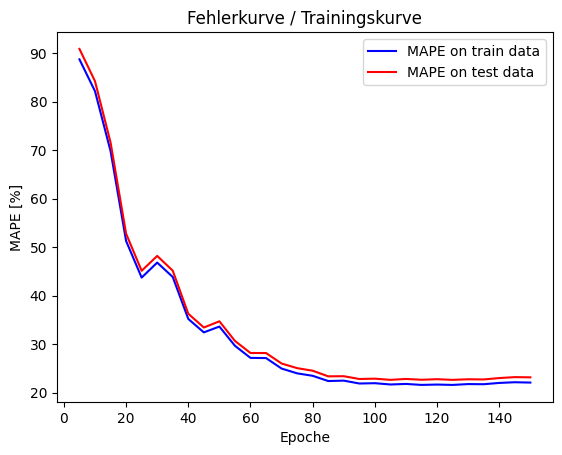

In [15]:
# 1. Datensatz einlesen und fürs ML vorbereiten
import mlpexps
fname = "data_cars_cleaned.csv"
list_target_cols = ["price_in_euro"]
x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor, scaler_input, scaler_output = \
    mlpexps.prepare_data(fname, list_target_cols)

# 2. Ein MLP Modell erstellen
input_dim = x_train_tensor.shape[1]
output_dim = y_train_tensor.shape[1]
model = mlpexps.create_model(input_dim, output_dim)

# 3. Das MLP trainieren und testen
mlpexps.train_and_test_MLP(150, model, x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor, scaler_output)

# `dropout` als Gegenmechanismus zum Overfitting

## Exkurs: Was macht eigentlich eine dropout-Layer mit meinem Tensor?

In [5]:
import torch.nn as nn
import torch
m = nn.Dropout(p=0.2)
input = torch.randn(10, 4)
output = m(input)

In [6]:
input

tensor([[-0.2965,  0.1321, -0.1439, -0.0478],
        [ 1.4407, -0.3189,  0.6891, -0.9813],
        [ 0.9036,  1.1752, -1.8428,  2.5927],
        [-0.0441, -0.2025, -0.0983,  0.7961],
        [-1.1380,  0.1779, -0.7338,  0.6026],
        [ 0.2256,  1.6582, -0.5825,  1.4459],
        [ 1.2799,  0.9300,  0.0672,  1.2403],
        [ 0.6363,  0.1414,  0.1125,  0.2740],
        [ 1.5195,  1.2341,  0.5712,  0.5165],
        [-0.0727, -0.4989, -0.1831, -0.8395]])

In [9]:
output

tensor([[-0.0000,  0.0000, -0.1798, -0.0000],
        [ 1.8009, -0.3986,  0.8613, -1.2266],
        [ 1.1295,  0.0000, -2.3035,  3.2408],
        [-0.0551, -0.2532, -0.1229,  0.9951],
        [-1.4225,  0.2224, -0.9173,  0.0000],
        [ 0.2819,  2.0728, -0.7281,  1.8074],
        [ 1.5999,  1.1625,  0.0841,  1.5504],
        [ 0.7953,  0.1768,  0.1406,  0.3424],
        [ 1.8994,  1.5426,  0.0000,  0.6456],
        [-0.0909, -0.6236, -0.2289, -1.0493]])

In [8]:
input.std()

tensor(0.8825)

In [10]:
fac = 1/(1-0.2)

In [11]:
fac

1.25

In [14]:
1.4459 * 1.25

1.807375

## Experiment: dropout vs. nicht-dropout

preparing data ...
creating model ...
training model ...
	testing model on train data ...
	testing model on test data ...
Epoch 5: train MAPE=89.43, test MAPE = 89.31


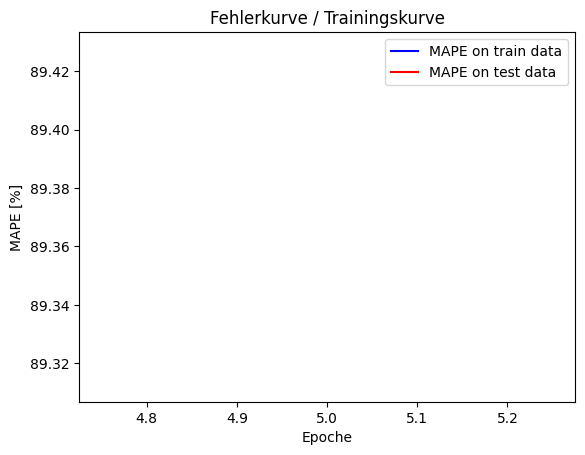

model_nr=0, dropoutactive=True --> MAPE=89.31260977384439
creating model ...
training model ...
	testing model on train data ...
	testing model on test data ...
Epoch 5: train MAPE=86.19, test MAPE = 86.12


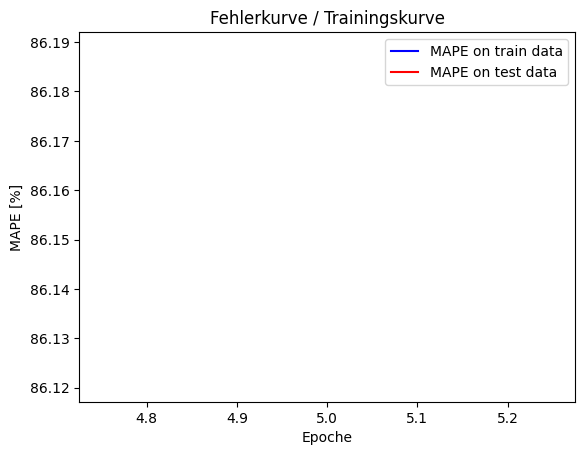

model_nr=0, dropoutactive=False --> MAPE=86.12056632356115
creating model ...
training model ...
	testing model on train data ...
	testing model on test data ...
Epoch 5: train MAPE=90.98, test MAPE = 90.74


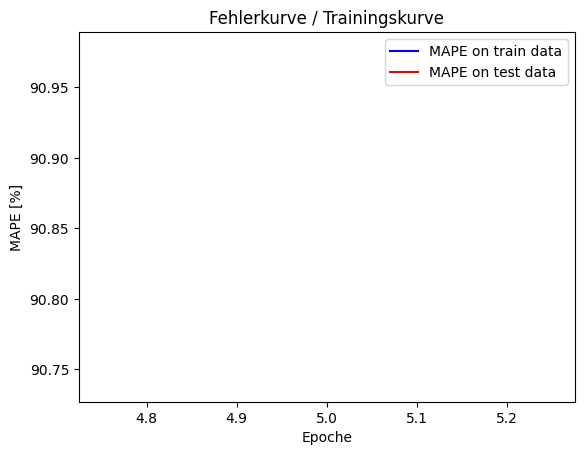

model_nr=1, dropoutactive=True --> MAPE=90.73900093610412
creating model ...
training model ...
	testing model on train data ...
	testing model on test data ...
Epoch 5: train MAPE=88.61, test MAPE = 88.52


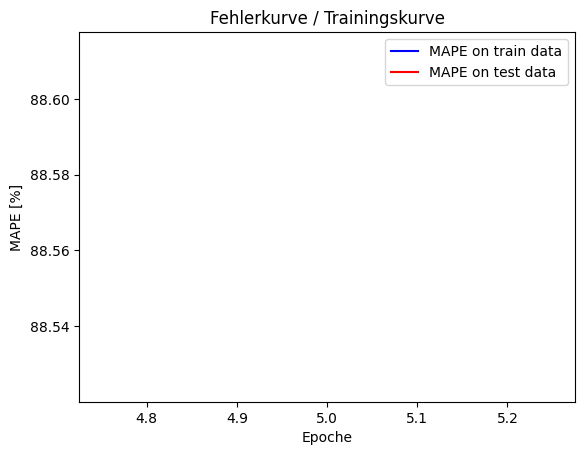

model_nr=1, dropoutactive=False --> MAPE=88.52449710315427


In [3]:
# 1. Datensatz einlesen und fürs ML vorbereiten
import mlpexps
fname = "data_cars_cleaned.csv"
list_target_cols = ["price_in_euro"]
x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor, scaler_input, scaler_output = \
    mlpexps.prepare_data(fname, list_target_cols)

# 2. Ein MLP Modell erstellen
input_dim = x_train_tensor.shape[1]
output_dim = y_train_tensor.shape[1]

d = {True : [],
     False : []}

nr_models = 2
nr_epochs = 5

import datetime
start = datetime.datetime.now()

for model_nr in range(nr_models):
    for dropoutactive in [True, False]:
 
        model = mlpexps.create_model(input_dim, output_dim, dropout=dropoutactive)
        
        MAPE = mlpexps.train_and_test_MLP(nr_epochs,
                                          model,
                                          x_train_tensor,
                                          y_train_tensor,
                                          x_test_tensor,
                                          y_test_tensor,
                                          scaler_output)
        
        print(f"model_nr={model_nr}, dropoutactive={dropoutactive} --> MAPE={MAPE}")
        
        d[dropoutactive].append( MAPE )

        import pickle
        datei = open("dropout_exps_results.pkl", "wb")
        pickle.dump(d, datei)
        datei.close() 

stop = datetime.datetime.now()
print(f"Dauer: {stop-start}")

In [4]:
d

{True: [89.31260977384439, 90.73900093610412],
 False: [86.12056632356115, 88.52449710315427]}

In [6]:
import datetime
start = datetime.datetime.now()

In [7]:
stop = datetime.datetime.now()

In [8]:
start

datetime.datetime(2023, 11, 23, 0, 40, 25, 921220)

In [9]:
stop

datetime.datetime(2023, 11, 23, 0, 40, 30, 726924)

In [11]:
str(stop-start)

'0:00:04.805704'